In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [131]:
# Set parameters.
nx = 81  # number of locations on the road
L = 4.0  # length of the road
dx = L / (nx - 1)  # distance between two consecutive locations
sigma=1.0

nt = 30  # number of time step to compute
v_max = 1.0  # maximum speed allowed on the road
dt=sigma * dx / v_max
rho_max = 10.0  # maximum car density allowed on the road
rho_light = 4.0  # car density at the stoplight

# Discretize the road.
x = numpy.linspace(0.0, L, num=nx)


In [133]:
def ic(x,rho_light,x_light=2.0):
    rho_i = numpy.zeros_like(x)
    mask = numpy.where(x <= 2.0)
    rho_i[mask] = rho_light * x[mask] / 2.0
    return rho_i

In [134]:
rho_0 = ic(x,rho_light)


In [135]:
def velocity(rho,rho_max=10.0,v_max=1.0):
    velocity = v_max * (1.0 - rho/rho_max)
    return velocity

In [136]:
def flux(rho,rho_max=10.0,v_max=1.0):
    flux = rho * v_max * (1.0 - rho/rho_max)
    return flux

In [137]:
def ftbs(rho_0,dt,dx,times):
    rho_hist=[rho_0.copy()]
    rho = rho_0.copy()
    for n in range(times):
        f=flux(rho)
        rho[1:] = rho[1:] - dt / dx * (f[1:] - f[:-1])
        #rho[0]=rho[-1]=0
        rho_hist.append(rho.copy())
        
    return rho_hist

In [138]:
rho_hist=ftbs(rho_0,dt,dx,nt)

In [141]:
def plot_solution(n,rho_hist,x):

    pyplot.figure()
    pyplot.title('Time Step:{}'.format(n))
    pyplot.xlabel('road')
    pyplot.ylabel('density')
    pyplot.grid()
    pyplot.plot(x, rho_hist[0],label='initial')
    pyplot.plot(x, rho_hist[n],label='current')
    pyplot.xlim(x[0],x[-1])
    pyplot.ylim(-0.5,11.0)
    pyplot.legend(loc='upper right')
    
    pyplot.show()

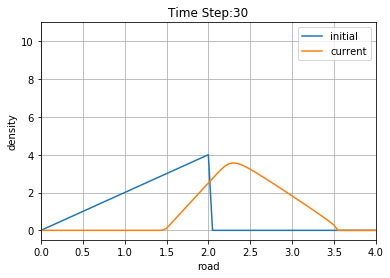

In [142]:
plot_solution(30,rho_hist,x)

In [118]:
import ipywidgets as ipyw

In [119]:
def interactive_plot(x,rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipyw.IntSlider(value=0,min=0,max=nt,step=1,description='time step')
    
    w = ipyw.interactive(plot_solution, n=nt_slider,
                         x=ipyw.fixed(x),
                         rho_hist=ipyw.fixed(rho_hist))
    return w

In [120]:
interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=30), Output()), _dom_classes=('widget-in…